文本挖掘是一个以半结构（如 WEB 网页）或者无结构（如纯文本）的自然语言文本为对象的数据挖掘，是从大规模文本数据集中发现隐藏的、重要的、新颖的、潜在的有用的规律的过程。，直观的说，当数据挖掘的对象完全由文本这种数据类型组成时，这个过程就称为文本挖掘。文本挖掘也称为文本数据挖掘。
<img src=a.png height=50% width=60%>

# 文本预处理技术

## 正则表达式

In [ ]:
import re
string = 'The small cake smell good. But it is too small.'

print(re.match(pattern='small', string=string))  # 从第一个字母开始
print(re.match(pattern='The small', string=string))  # 从第一个字母开始
print(re.search(pattern='small', string=string))  # 查找一个
print(re.findall(pattern='small', string=string))  # 查找所有
print(re.sub(pattern='small', repl='big', string=string))  # 替换

In [ ]:
string = 'small smell sm.ll smll smaall sm3ll smAll smaaaall'

re.findall('small', string)  # 匹配small
re.findall('small|smell', string)  # 匹配small或者smell
re.findall('sm.ll', string)  # .表示任意一个字符
re.findall('sm[aesd]ll', string)  # []里的字符可以被匹配一次
re.findall('sm[a-z]ll', string)  # [a-z]所有小写字母可以被匹配一次
re.findall('sm[a-zA-Z0-9]ll', string)  # [a-zA-Z0-9]所有大小写字母和数字可以被匹配一次
re.findall('sm\.ll', string)  # 匹配.本身需要转义

# 量化符号
print(re.findall('sm[a-z]{1,2}ll', string))  # {1,2}表示前面的元素匹配一次或者两次
print(re.findall('sm[a-z]{2}ll', string))  # {2}表示前面的元素匹配两次
print(re.findall('sm[a-z]{2,}ll', string))  # {2}表示前面的元素匹配两次以上(贪婪)
print(re.findall('sm[a-z]?ll', string))  # 前面的内容匹配0次或1次，同{0,1}
print(re.findall('sm[a-z]+ll', string))  # 前面的内容匹配1次或以上，同{1,}
print(re.findall('sm[a-z]*ll', string))  # 前面的内容匹配0次或以上，同{0,}

In [ ]:
string = 'My name is YangHui.'

s = re.findall('My name is ([a-zA-Z]+)\.', string)

print('\nHi!'+ 'YangHui')
print('\nHi!'+ s[0])

练习

In [ ]:
rawdata = '555-1239Moe Szyslak(636) 555-0113Burns, C.Montgomery555-6542Rev. Timothy Lovejoy555 8904Ned Flanders636-555-3226Simpson,Homer5553642Dr. Julius Hibbert'
tel = re.findall('\(?[0-9]{0,3}\)?[ -]?[0-9]{3}[- ]?[0-9]{4}', rawdata)
name = re.findall('[A-Z][A-Z .,a-z]+', rawdata)
import pandas as pd
pd.DataFrame({'TelPhone': tel, 'Name': name})

作业：<br>
1、找出以下信息中的电话号码及人名。

In [ ]:
rd = '李磊: 248-555-1234；韩梅梅: (313) 555-1234  迪丽热巴: (810)555-1234阿里巴巴: 734.555.9999'

print(re.findall('[^0-9 ；()\-:]{2,}', rd))
print(re.findall('[\u4E00-\u9FD5]+', rd))

print(re.findall('[0-9(][0-9\- ).]+', rd))

2、将句子中年份的大写数字改为阿拉伯数字

In [ ]:
import re
m0 = "在一九四九年新中国成立"
m1 = "比一九九零年低百分之五点二"
m2 = '人一九九六年击败俄军,取得实质独立'
data = [m0, m1, m2]
a = list('一二三四五六七八九零')
b = list('1234567890')
my_dict = dict(zip(a, b))
data2 = []
for m in data:
    tem = re.findall('(.{4})年', m)
    c = ''.join([my_dict[i] for i in list(tem[0])])
    data2.append(re.sub('(.{4})年', c + '年', m))
print(data2)

## 分词

### 最大正向匹配法

1、读取词典

In [ ]:
with open('../data/字典.txt', 'r', encoding='utf-8') as f:
    my_dict = f.readlines()
my_dict = [i.split()[0] for i in my_dict]
my_dict[:5]

2、最大正向匹配法

In [ ]:
sentence = '今天我来到北京清华大学'
max_len = 5

words = []
while len(sentence) != 0:
    tmp = sentence[:max_len]
    while tmp not in my_dict and len(tmp) > 1:
        tmp = tmp[:-1]
    words.append(tmp)
    sentence = sentence[len(tmp):]
    
print(words)

### 最大逆向匹配法（练习）

In [ ]:
sentence = '今天我来到北京清华大学'
max_len = 5

words = []
while len(sentence) != 0:
    tmp = sentence[-max_len:]
    while tmp not in my_dict and len(tmp) > 1:
        tmp = tmp[1:]
    words = [tmp] + words
    sentence = sentence[:-len(tmp)]
print(words)

### HMM

In [ ]:
p_start = {'good':0.63, 'normal':0.17, 'bad':0.2}  # 初始概率矩阵
p_emit = {
    'good':{'working':0.05, 'travel':0.35, 'shopping':0.35, 'running':0.25},
    'normal':{'working':0.25, 'travel':0.25, 'shopping':0.25, 'running':0.25},
    'bad':{'working':0.6, 'travel':0.2, 'shopping':0.05, 'running':0.15}
}  # 发射概率矩阵
p_trans = {
    'good':{'good':0.5, 'normal':0.375, 'bad':0.125},
    'normal':{'good':0.25, 'normal':0.125, 'bad':0.625},
    'bad':{'good':0.25, 'normal':0.375, 'bad':0.375} }  # 转移概率矩阵

1、穷举法

In [ ]:
obs = ['working', 'shopping', 'travel']
states = ['good', 'normal', 'bad']
V = [{}]

# 初始化
for y in states:
    V[0][y] = p_start[y] * p_emit[y][obs[0]]
print(V)

for t in range(1, len(obs)):
    V.append({})
    for y in states:
        for i, j in V[t-1].items():
            pre_state = i.split('-')[-1]
            V[t][i+'-'+y] = j * p_trans[pre_state][y] * p_emit[y][obs[t]]
print(sum([len(i) for i in V]))

(prob, path) = max((j, i) for i,j in V[-1].items())
print(f'观察状态连续为{obs}, 心情可能是{path}, 概率为{prob}')

2、维特比算法

In [ ]:
obs = ['working', 'shopping', 'travel']
states = ['good', 'normal', 'bad']
V = [{}]
path = [{}]

# 初始化
for y in states:
    V[0][y] = p_start[y] * p_emit[y][obs[0]]
    path[0][y] = [y]

for t in range(1, len(obs)):
    V.append({})
    path.append({})
    for y in states:
        em_p = p_emit[y][obs[t]]
        (prob, state) = max((V[t-1][y0]*p_trans[y0][y]*em_p, y0) for y0 in states)
        V[t][y] = prob
        path[t][y] = path[t-1][state] + [y]
(prob, last_state) = max(((j, i) for i, j in V[-1].items()))

print(f'观察状态连续为{obs}, 心情可能是{path[-1][last_state]}, 概率为{prob}')

In [ ]:
print(sum([len(i) for i in V]))b

3、HMM应用：分词（维特比算法）

In [16]:
import sys
sys.path.append(r'..\data')
from hmm.prob_start import P as p_start
from hmm.prob_trans import P as p_trans
from hmm.prob_emit import P as p_emit

In [32]:
obs = '今天我来到北京清华大学'
states = list('BMES')

V = [{}]
path = [{}]

# t时刻状态：t-1时刻可能的状态
prevStates = {'M': list('MB'),
              'B': list('ES'),
              'S': list('SE'),
              'E': list('BM')}


# 初始化
for y in states:
    V[0][y] = p_start[y] + p_emit[y][obs[0]]
    path[0][y] = [y]
print(V, '\n', path)    

for t in range(1, len(obs)):
    V.append({})
    path.append({})
    for y in states:
        emit_p = p_emit[y][obs[t]]
        (prob, state) = max((V[t-1][y0] + p_trans[y0][y] + emit_p, y0) for y0 in prevStates[y])
        V[t][y] = prob
        path[t][y] = path[t-1][state] + [y]
(prob, last_state) = max((V[-1][y], y) for y in list('ES'))
sentence_label = path[-1][last_state]

words = []
for i, char in enumerate(obs):
    sign = sentence_label[i]
    if sign == 'B':
        begin = i
    elif sign == 'E':
        words.append(obs[begin: i+1])
    elif sign == 'S':
        words.append(obs[i])

print(f'\n"{obs}"的标注为：\n{sentence_label}\n分词结果为：\n{words}')

[{'B': -6.8985414338214115, 'M': -3.14e+100, 'E': -3.14e+100, 'S': -8.598245859008907}] 
 [{'B': ['B'], 'M': ['M'], 'E': ['E'], 'S': ['S']}]

"今天我来到北京清华大学"的标注为：
['B', 'E', 'S', 'S', 'S', 'B', 'E', 'B', 'M', 'M', 'E']
分词结果为：
['今天', '我', '来', '到', '北京', '清华大学']


### jieba分词

In [34]:
import jieba
print(jieba.lcut(obs))
print(jieba.lcut_for_search(obs))

['今天', '我', '来到', '北京', '清华大学']
['今天', '我', '来到', '北京', '清华', '华大', '大学', '清华大学']


In [35]:
sentence = '广州泰迪智能科技有限公司欢迎您！'
print(jieba.lcut(sentence))
jieba.add_word('广州泰迪智能科技有限公司')
print(jieba.lcut(sentence))

['广州', '泰迪', '智能', '科技', '有限公司', '欢迎您', '！']
['广州泰迪智能科技有限公司', '欢迎您', '！']


《鹿鼎记》分词

In [39]:
# 读取文本文件
with open('../data/鹿鼎记.txt', 'r', encoding='utf-8') as f:
    txt = f.read()
txt = txt.replace('&#39;', '')
txt = txt.replace('\ufeff', '')
txt = txt.split()
txt[:7]

['《鹿鼎记》',
 '作者：金庸',
 '正文',
 '第一回',
 '纵横钩党清流祸',
 '峭茜风期月旦评',
 '北风如刀，满地冰霜。江南近海滨的一条大路上，一队清兵手执刀枪，押着七辆囚车，冲风冒寒，向北而行。前面三辆囚车中分别监禁的是三个男子，都作书生打扮，一个是白发老者，两个是中年人。后面四辆囚车中坐的是女子，最后一辆囚车中是个少*妇，怀中抱着个女婴，女婴啼哭不休。她母亲温言相呵，女婴只是大哭。囚车旁一清兵恼了，伸腿在车上踢了一脚，喝道：“再哭，再哭，老子踢死你！”那女婴一惊，哭得更加响了。离开道路数十丈处有座大屋，屋檐下站着一个中年文士，一个十一二岁的小孩。那文士见到这等情景，不禁长叹一声，眼眶也红了，说道：“可怜，可怜！”农小孩问道：“爹爹，他们犯了什么罪？”那文士道：“又犯了什么罪？昨日和今朝已逮去了三十几人，都是我们浙江有名的读书人，个个都是无辜株连。”他说到“无辜株连”四子，声音压得甚低，生怕给押囚车的官兵听见了。那小孩道：“哪个小女孩还在吃奶，难道也犯了罪么？真没道理。”那文士道：“你懂得官兵没道理，真是好孩子。咳，人为刀俎，我为鱼肉，人为鼎锅，我为麋鹿！”那小孩道：“爹，你前几天教过我。人为刀俎，我为鱼肉，就是给人家斩割屠杀的意思。人家是切菜刀，是铁板，我们就是鱼和肉。“人为鼎锅，我为麋鹿”这两句话，意思也差不多么？”那文士道：“正是！”眼见官兵和囚车已经去远，拉着小孩的手道：“外面风大，我们回屋里去。”当下父子二人走进书房。那文士提笔醮上了墨，在纸上写了个“鹿”字，说道：“鹿这种野兽，虽是庞然大物，性子却极为平和，只吃青草和树叶，从来不伤害别的野兽。凶猛的野兽要伤它吃它，它只有逃跑倘若逃不了，那只有给人家吃力。”又写了“逐鹿”两字，说道：“因此古人常常拿鹿来比喻天下。世上百姓都温顺善良，只有给人欺压残害的份儿。《汉书》上说：“秦失其鹿，天下共逐之。”那就是说，秦朝失了天下，群雄并起，大家争夺，最后汉高祖打败了楚霸王，就得了这只又肥又大的鹿。那文士提笔醮上了墨，在纸上写了个“鹿”字，说道：“鹿这种野兽，虽是庞然大物，性子却极为平和，只吃青草和树叶，从来不伤害别的野兽。凶猛的野兽要伤它吃它，它只有逃跑倘若逃不了，那只有给人家吃力。”又写了“逐鹿”两字，说道：“因此古人常常拿鹿来比喻天下。世上百姓都温顺善良，只有给人欺压残害的份儿。《汉书》上说

In [41]:
# 查看自定义词典
with open('../data/self_dict.txt', 'r', encoding='utf-8') as f:
    my_dict = f.read()
my_dict = my_dict.split()
my_dict

['没什麽',
 '阿碧',
 '阿二',
 '阿尔尼',
 '阿凡提',
 '阿凡提妻',
 '阿根',
 '阿洪',
 '阿济赤',
 '阿九',
 '阿里',
 '阿曼',
 '阿三',
 '阿胜',
 '阿朱',
 '阿紫',
 '哀牢山三十六剑',
 '矮老者',
 '安大娘',
 '安奉日',
 '安健刚',
 '安剑清',
 '黯然销魂掌',
 '安提督',
 '暗香疏影',
 '安小慧',
 '鳌拜',
 '敖彪',
 '獒口夺杖',
 '巴豆汁',
 '八方归元',
 '八卦刀',
 '八卦金刀',
 '八卦门',
 '八卦游龙掌',
 '八卦游身掌',
 '八卦掌',
 '八卦阵',
 '八荒六合唯我独尊功',
 '八极门',
 '八极拳',
 '八口山铭',
 '巴郎星',
 '八十一路三节棍',
 '八十一路五虎刀',
 '巴泰',
 '巴天石',
 '八仙剑',
 '八仙剑法',
 '八仙汤',
 '巴颜法师',
 '八阵八卦掌',
 '白阿绣',
 '百变千幻衡山云雾十三式',
 '百草仙',
 '白二',
 '白龟寿',
 '白寒枫',
 '白寒松',
 '白鹤亮翅',
 '百合散',
 '白虹贯日',
 '白虎夺命丹',
 '白虎跳涧',
 '百花错拳',
 '百花腹蛇膏',
 '百花消魂散',
 '白脸人',
 '白马啸西风',
 '白蟒鞭',
 '百年炼狱',
 '百胜软鞭',
 '白世镜',
 '白驼雪山掌',
 '白万剑',
 '百涎丸',
 '白熊',
 '白云苍狗',
 '白云出岫',
 '白云熊胆丸',
 '百丈飞瀑',
 '白振',
 '白自在',
 '般若掌',
 '班淑娴',
 '棒打狗头',
 '棒打双犬',
 '傍花拂柳',
 '包不同',
 '抱残式',
 '鲍承先',
 '鲍大楚',
 '抱虎归山',
 '宝灵拳',
 '鲍千灵',
 '宝树',
 '豹胎易筋丸',
 '豹尾脚',
 '包惜弱',
 '宝象和尚',
 '鲍鱼之肆',
 '北斗大阵',
 '贝海石',
 '贝锦仪',
 '北冥神功',
 '贝人龙',
 '悲酥清风',
 '北渔拓跋氏',
 '本参',
 '本观',
 '本相',
 '本因',
 '彼得',
 '笔贴式',
 '辟邪剑法',
 '碧血剑',
 '碧渊腾蛟',
 '碧针清掌',


In [43]:
# 分词
jieba.load_userdict('../data/self_dict.txt')
data_cut = [jieba.lcut(i) for i in txt]
data_cut[:5]

[['《', '鹿鼎记', '》'],
 ['作者', '：', '金庸'],
 ['正文'],
 ['第一回'],
 ['纵横', '钩', '党', '清流', '祸']]

## 绘制词云

### 词频统计

In [45]:
all_words = []
for i in data_cut:
    all_words.extend(i)
all_words

['《',
 '鹿鼎记',
 '》',
 '作者',
 '：',
 '金庸',
 '正文',
 '第一回',
 '纵横',
 '钩',
 '党',
 '清流',
 '祸',
 '峭茜',
 '风期',
 '月旦评',
 '北风',
 '如刀',
 '，',
 '满地',
 '冰霜',
 '。',
 '江南',
 '近',
 '海滨',
 '的',
 '一条',
 '大',
 '路上',
 '，',
 '一队',
 '清兵',
 '手执',
 '刀枪',
 '，',
 '押',
 '着',
 '七辆',
 '囚车',
 '，',
 '冲风冒寒',
 '，',
 '向',
 '北而行',
 '。',
 '前面',
 '三辆',
 '囚车',
 '中',
 '分别',
 '监禁',
 '的',
 '是',
 '三个',
 '男子',
 '，',
 '都',
 '作',
 '书生',
 '打扮',
 '，',
 '一个',
 '是',
 '白发',
 '老者',
 '，',
 '两个',
 '是',
 '中年人',
 '。',
 '后面',
 '四辆',
 '囚车',
 '中',
 '坐',
 '的',
 '是',
 '女子',
 '，',
 '最后',
 '一辆',
 '囚车',
 '中是',
 '个',
 '少',
 '*',
 '妇',
 '，',
 '怀中',
 '抱',
 '着',
 '个',
 '女婴',
 '，',
 '女婴',
 '啼哭',
 '不休',
 '。',
 '她',
 '母亲',
 '温言',
 '相呵',
 '，',
 '女婴',
 '只是',
 '大哭',
 '。',
 '囚车',
 '旁一',
 '清兵',
 '恼',
 '了',
 '，',
 '伸腿',
 '在',
 '车上',
 '踢',
 '了',
 '一脚',
 '，',
 '喝道',
 '：',
 '“',
 '再',
 '哭',
 '，',
 '再',
 '哭',
 '，',
 '老子',
 '踢死',
 '你',
 '！',
 '”',
 '那',
 '女婴',
 '一惊',
 '，',
 '哭',
 '得',
 '更加',
 '响',
 '了',
 '。',
 '离开',
 '道路',
 '数十丈',
 '处有',
 '座',
 '大屋',
 '，',
 '屋檐下',
 '

In [47]:
import pandas as pd
tmp = pd.Series(all_words)
num = tmp.value_counts()

### 绘制词云

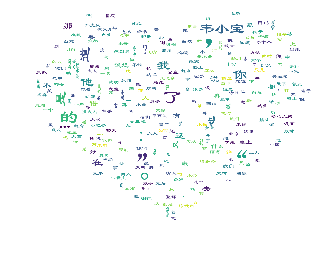

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

pic = plt.imread('../data/aixin.jpg')
wc = WordCloud(background_color='white', max_words=300,
               font_path=r'C:\Windows\Fonts\SIMLI.TTF', 
               mask=pic)
wc2 = wc.fit_words(num)
plt.figure(figsize=(5, 5))
plt.imshow(wc2)
plt.axis('off')
plt.show()

## 去除停用词

In [64]:
with open('../data/stoplist.txt', 'r', encoding='utf-8') as f:
    stop = f.read()
stop = stop.split()
stop = [' '] + stop
stop

[' ',
 '\ufeff',
 '：',
 '&#',
 '】',
 '【',
 ',',
 '!',
 '会',
 '的',
 '日',
 '月',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’',
 '‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '【',
 '】',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一一',
 '一下',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一则通过',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一时',
 '一来',
 '一样',
 '一次',
 '一片

In [65]:
data_after = [[j for j in i if j not in stop] for i in data_cut]
print(data_cut[:5])
print(data_after[:5])

[['《', '鹿鼎记', '》'], ['作者', '：', '金庸'], ['正文'], ['第一回'], ['纵横', '钩', '党', '清流', '祸']]
[['鹿鼎记'], ['作者', '金庸'], ['正文'], ['第一回'], ['纵横', '钩', '党', '清流', '祸']]


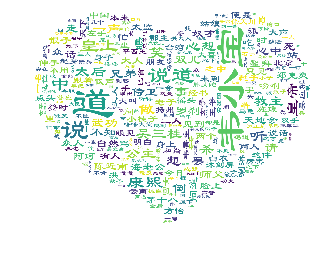

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = []
for i in data_after:
    all_words.extend(i)

tmp = pd.Series(all_words)
num = tmp.value_counts()


pic = plt.imread('../data/aixin.jpg')
wc = WordCloud(background_color='white', max_words=300,
               font_path=r'C:\Windows\Fonts\SIMLI.TTF', 
               mask=pic)
wc2 = wc.fit_words(num)
plt.figure(figsize=(5, 5))
plt.imshow(wc2)
plt.axis('off')
plt.show()

# 练习：垃圾短信分类

## 文件读取

In [69]:
import pandas as pd
message = pd.read_csv('../data/message/data/message80.csv', header=None)
message.columns = ['id', 'labels', 'content']
message.head()

,id,labels,content
0,1,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
1,2,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
2,3,0,带给我们大常州一场壮观的视觉盛宴
3,4,0,有原因不明的泌尿系统结石等
4,5,0,23年从盐城拉回来的麻麻的嫁妆


## 数据抽取

In [78]:
n = 1000
data = message.loc[message['labels'] == 1, ].sample(n, random_state=123)
data = pd.concat([data, message.loc[message['labels'] == 0, ].sample(n, random_state=123)])

In [79]:
data.shape

(2000, 3)

In [89]:
import re
import jieba
data_cut = data.content.apply(lambda x: jieba.lcut(re.sub('[^\u4E00-\u9FD5]+', '', x)))

In [90]:
with open('../data/stoplist.txt', 'r', encoding='utf-8') as f:
    stop = f.read()
stop = stop.split()
stop = [' '] + stop

In [111]:
data_after = data_cut.apply(lambda x: [i for i in x if i not in stop])

In [99]:
import itertools
tmp = list(itertools.chain.from_iterable(list(data_after)))
# list(itertools.chain(*list(data_after)))

num = pd.Series(tmp).value_counts()

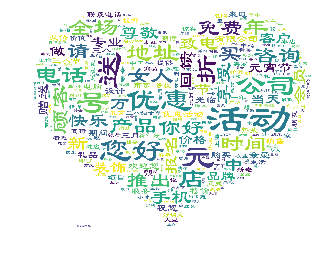

In [100]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

pic = plt.imread('../data/aixin.jpg')
wc = WordCloud(background_color='white', max_words=300,
               font_path=r'C:\Windows\Fonts\SIMLI.TTF', 
               mask=pic)
wc2 = wc.fit_words(num)
plt.figure(figsize=(5, 5))
plt.imshow(wc2)
plt.axis('off')
plt.show()

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# data_after = data_after.loc[data_after.apply(len) > 0]
tmp = data_after.apply(lambda x: ' '.join(x))
x_train, x_test, y_train, y_test = train_test_split(
    tmp, data.loc[data_after.index, 'labels'], test_size=.2, random_state=123
)

cv = CountVectorizer().fit(x_train)
cv_train = cv.transform(x_train)
cv_test = cv.transform(x_test)

In [114]:
model = MultinomialNB().fit(cv_train, y_train)
model.score(cv_test, y_test)

0.8725

# 文本向量表示

## 词频

## TF-IDF值

# 常用文本分类器

## kNN

## Naive Bayes

## SVM

# 模型评估